In [ ]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.9 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import mne
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
fname = "oddball_example_small-fif.gz"

### Reading raw data

In [ ]:
raw = mne.io.read_raw_fif(fname,preload=True)

Opening raw data file oddball_example_small-fif.gz...


<ipython-input-12-ce40ec63d7a3>:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname,preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [ ]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

Using matplotlib as 2D backend.


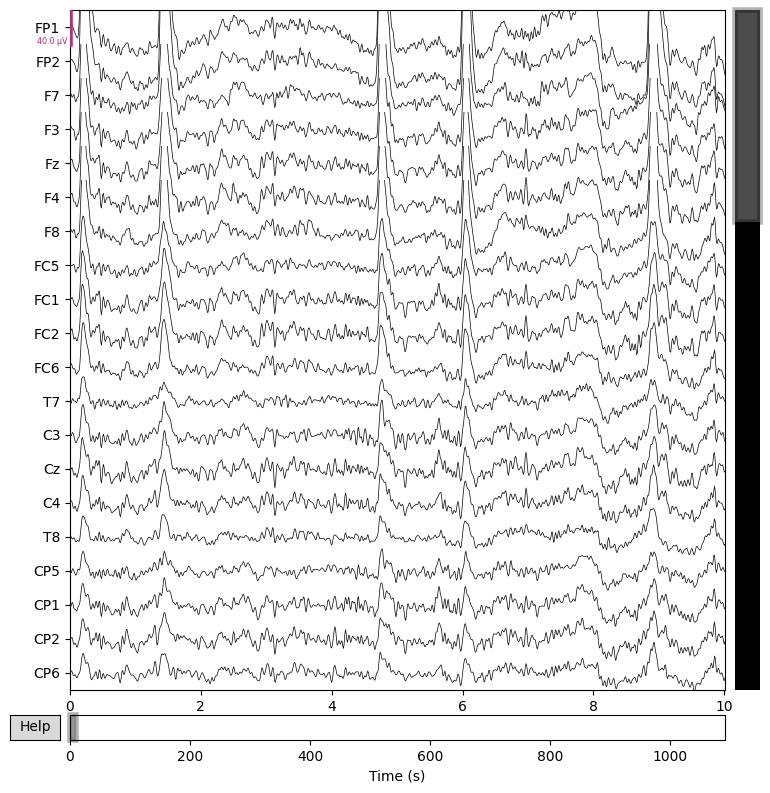

In [ ]:
raw.plot();

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [ ]:
ica.fit(raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 28.6s.


<ICA | raw data decomposition, method: fastica (fit in 72 iterations on 109098 samples), 20 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

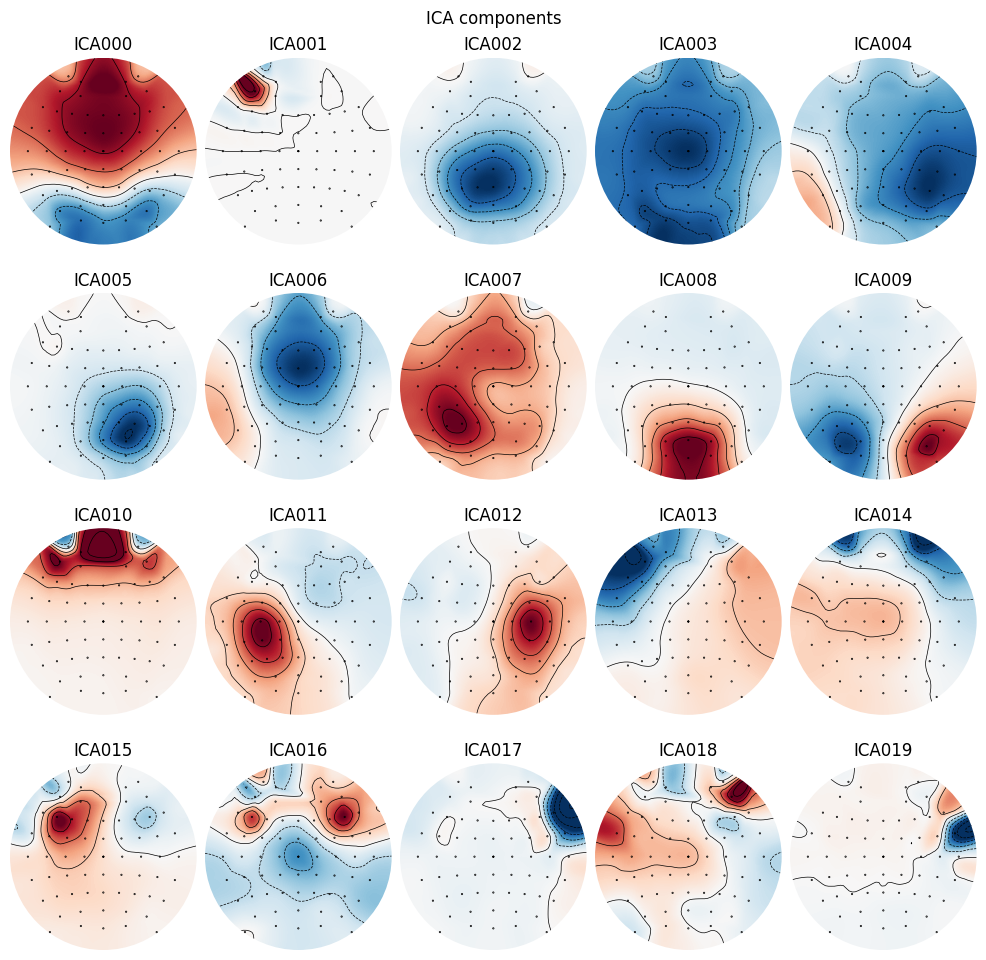

In [ ]:
ica.plot_components(outlines="head");

In [ ]:
ica.plot_components?

In [ ]:
ica.exclude = [1,10,14,17,18,19]

In [ ]:
bad_idx, scores  = ica.find_bads_eog(raw, "SO2", threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


[14, 10]


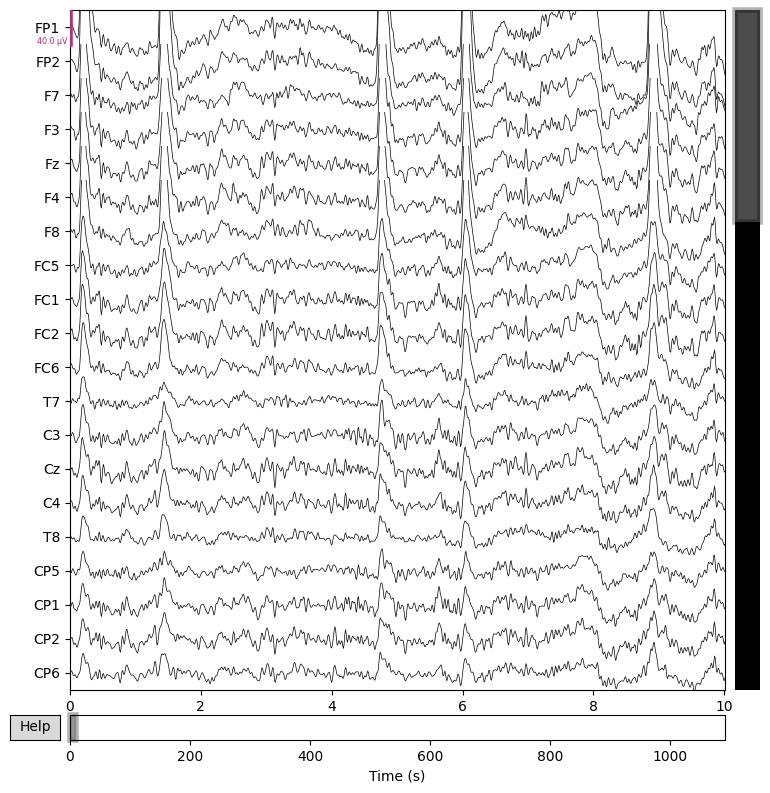

In [ ]:
raw.plot();

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


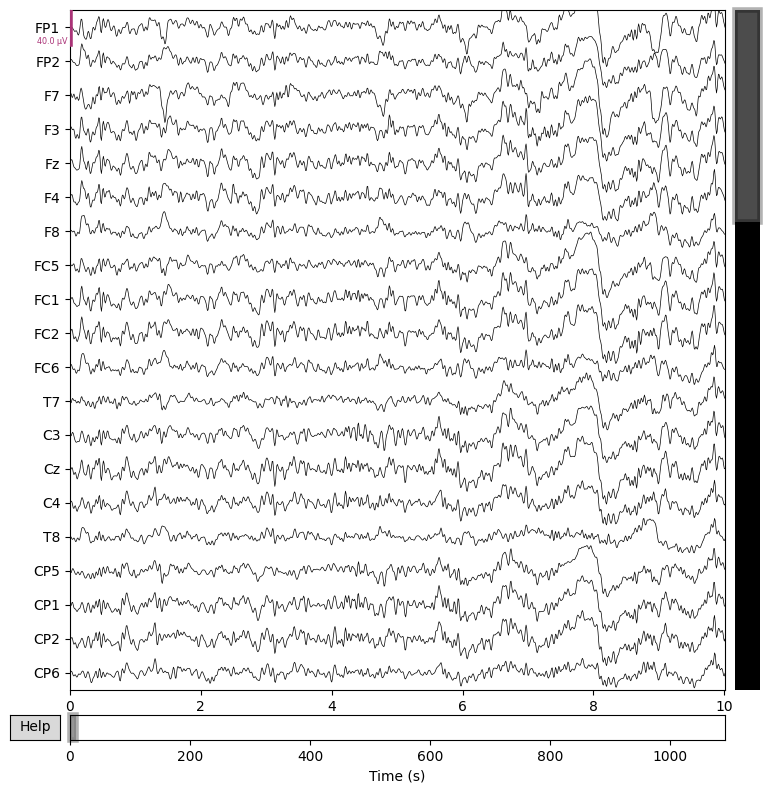

In [ ]:
ica.apply(raw.copy(),exclude=ica.exclude).plot();

### Epochs

In [ ]:
events = mne.find_events(raw)

903 events found on stim channel STI 014
Event IDs: [100 200]


In [ ]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]])

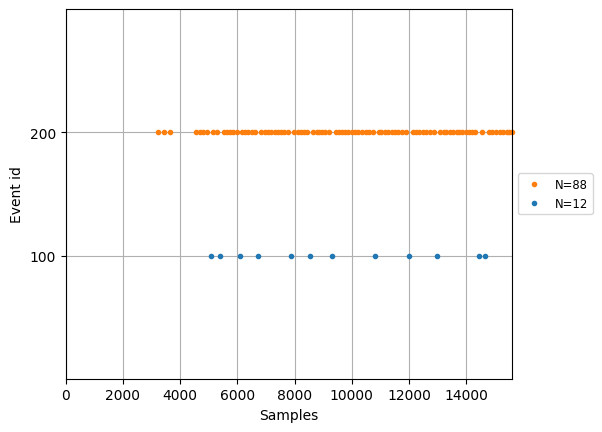

In [ ]:
mne.viz.plot_events(events[:100]);

In [ ]:
event_ids = {"standard/stimulus":200, "target/stimulus":100}
epochs = mne.Epochs(raw,events,event_id=event_ids,preload=True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


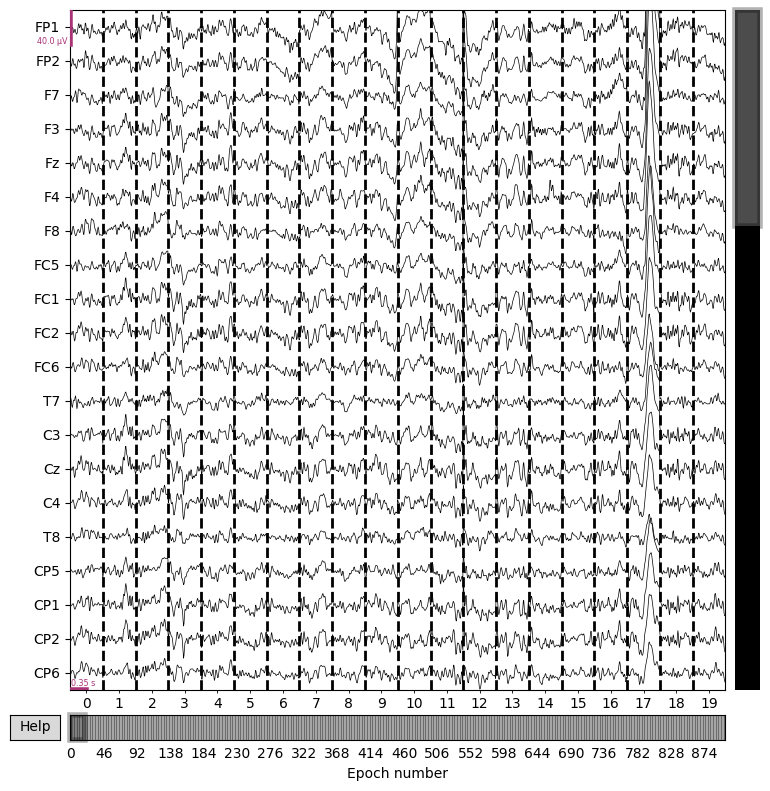

In [ ]:
epochs.plot();

In [ ]:
epochs = ica.apply(epochs,exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


<ipython-input-28-4948fdb6d6e1>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs,exclude=ica.exclude)


In [ ]:
epochs.apply_baseline((None,0))

Applying baseline correction (mode: mean)


<Epochs |  903 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

In [ ]:
epochs["target"]

<Epochs |  106 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~3.7 MB, data loaded,
 'target/stimulus': 106>

In [ ]:
epochs["stimulus"]

<Epochs |  903 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

In [ ]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


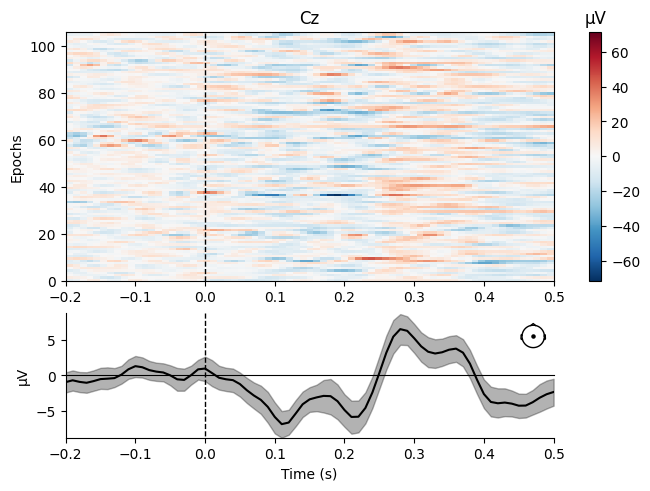

In [ ]:
epochs["target"].plot_image(picks=[13]);

In [ ]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<Epochs |  212 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~7.4 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

In [ ]:
epochs.save("oddball-epo.fif")

FileExistsError: Destination file exists. Please use option "overwrite=True" to force overwriting.

In [ ]:
epochs_for_tfr = mne.Epochs(raw,events,event_id=event_ids,tmin=-.5,tmax=1.5,preload=True)
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)
epochs_for_tfr.equalize_event_counts(event_ids);
epochs_for_tfr.save("oddball-long-epo.fif")

In [ ]:
ls

### Evoked

In [ ]:
epochs

<Epochs |  212 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~7.4 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

In [ ]:
target = epochs["target"].average()
target

<Evoked | 'target/stimulus' (average, N=106), -0.2 – 0.5 s, baseline -0.2 – 0 s, 63 ch, ~102 kB>

In [ ]:
standard = epochs["standard"].average()
standard

<Evoked | 'standard/stimulus' (average, N=106), -0.2 – 0.5 s, baseline -0.2 – 0 s, 63 ch, ~102 kB>

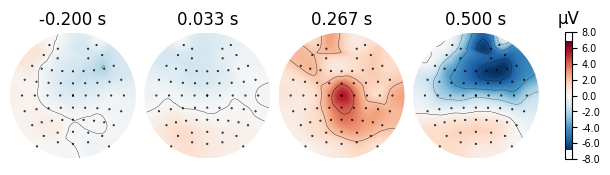

In [ ]:
target.plot_topomap();

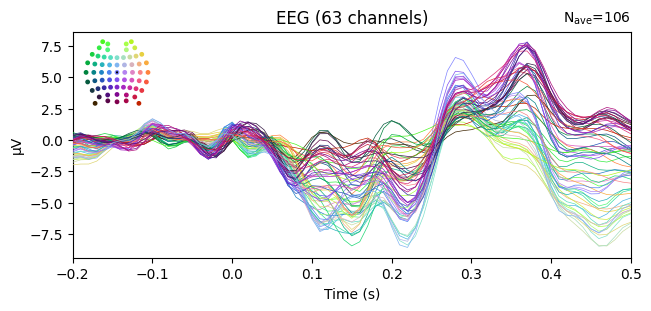

In [ ]:
target.plot(unit=1,exclude=[]);

In [ ]:
target.plot?

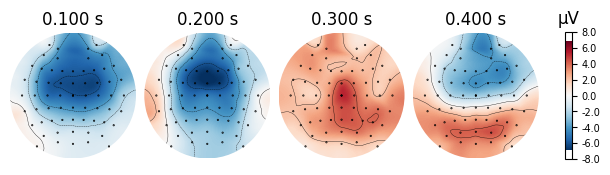

In [ ]:
target.plot_topomap(times=[0.1,0.2,0.3,0.4]);

No projector specified for this dataset. Please consider the method self.add_proj.


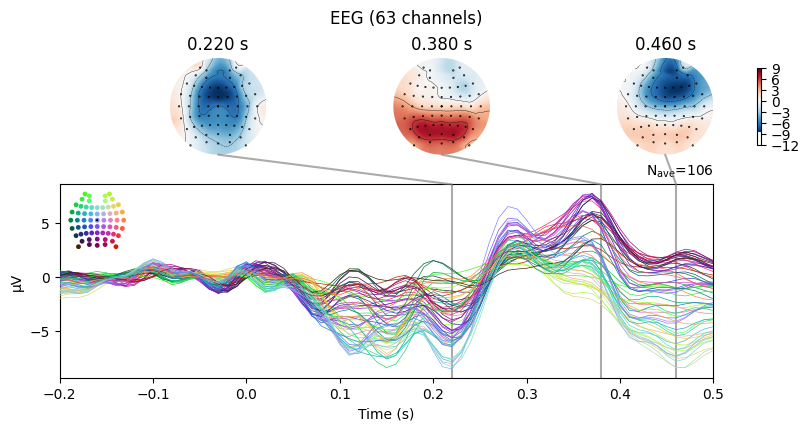

In [ ]:
target.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


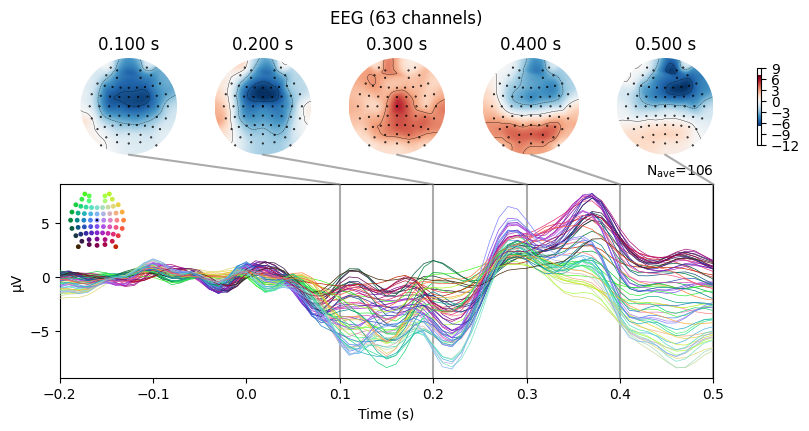

In [ ]:
target.plot_joint(times=[0.1,0.2,0.3,0.4,0.5]);

No projector specified for this dataset. Please consider the method self.add_proj.


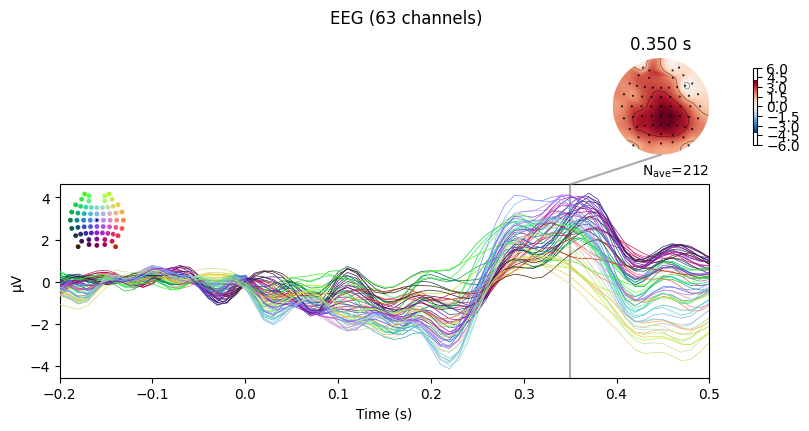

In [ ]:
diff = mne.combine_evoked((target, -standard),weights="equal")
diff.plot_joint(times=.35);

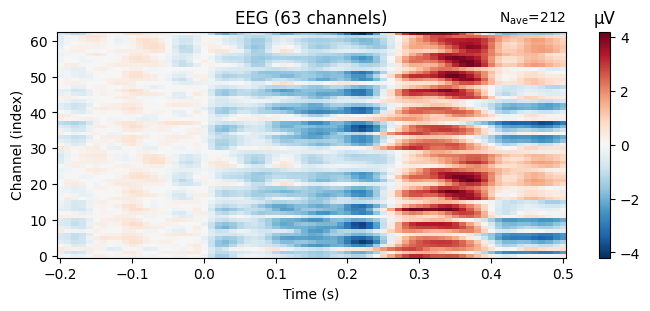

In [ ]:
diff.plot_image();

No projector specified for this dataset. Please consider the method self.add_proj.


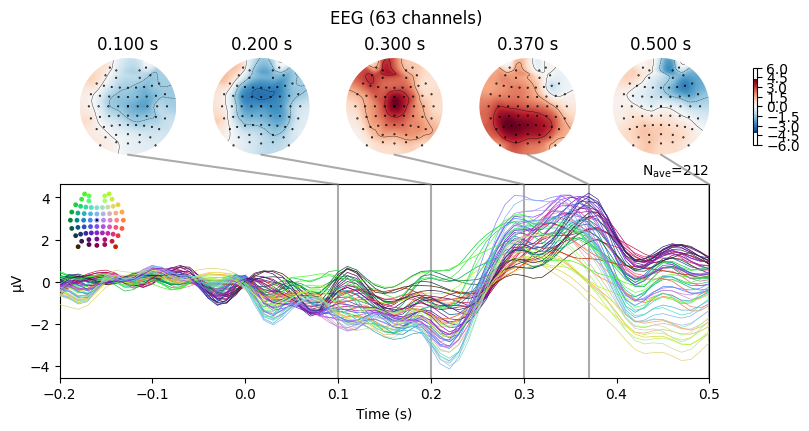

In [ ]:
diff = mne.combine_evoked((target, -standard),weights = "equal")
diff.plot_joint(times=[0.1,0.2,0.3,0.37,0.5]);

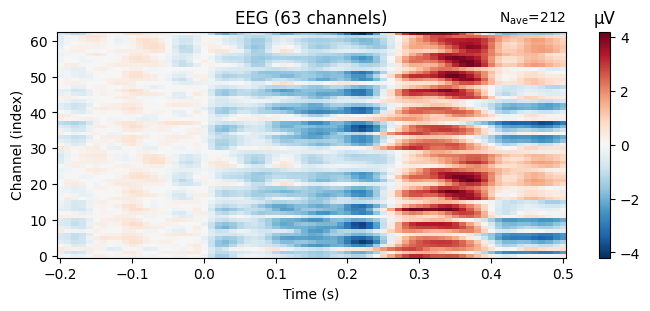

In [ ]:
diff.plot_image();

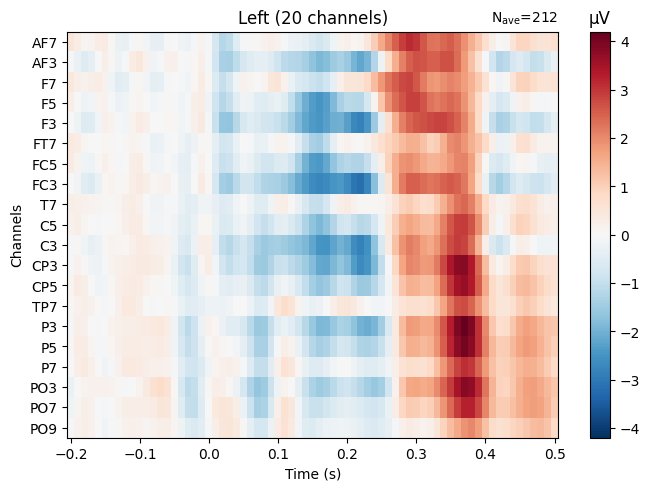

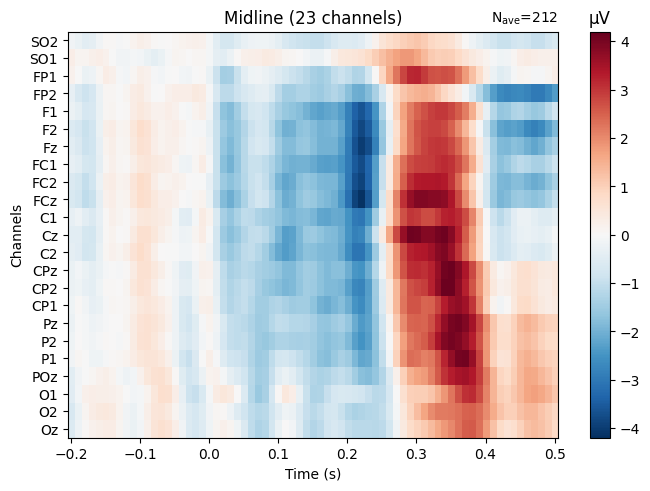

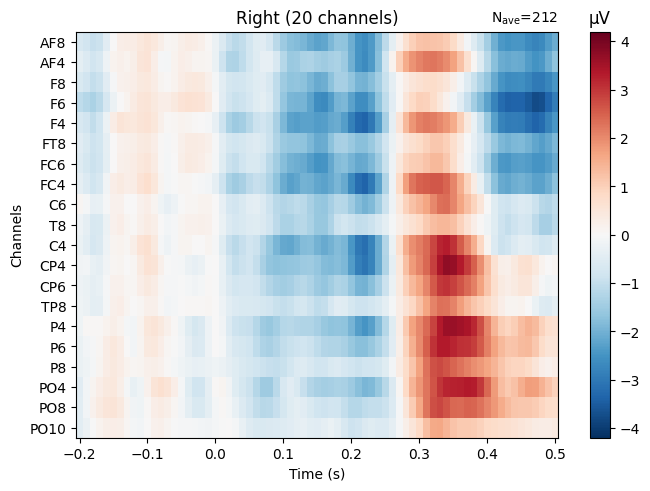

In [ ]:
rois = mne.channels.make_1020_channel_selections(diff.info,midline="z12")
diff.plot_image(group_by=rois, show=False,show_names="all");

In [ ]:
rois

{'Left': array([25, 57, 58, 20, 53, 21, 48, 16, 49, 12, 44, 11, 40,  7, 39,  3, 34,
         2, 31, 30]),
 'Midline': array([27, 28, 26, 59, 54, 55, 22, 17, 18, 50, 46, 13, 45, 62,  9,  8,  4,
        36, 35,  1,  0, 38, 43]),
 'Right': array([29, 61, 60, 24, 56, 23, 52, 19, 51, 14, 15, 47, 41, 10, 42,  5, 37,
         6, 32, 33])}

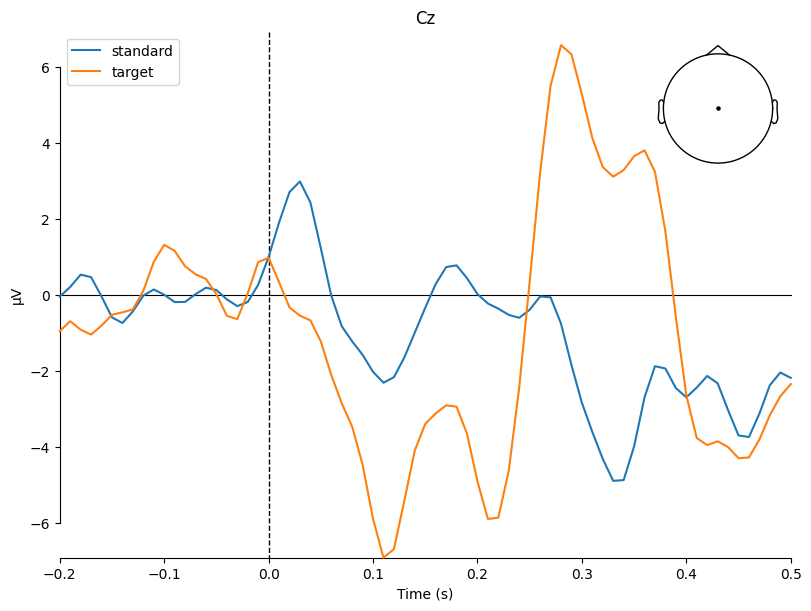

In [ ]:
mne.viz.plot_compare_evokeds({"standard": standard, "target" : target},picks=[13]);

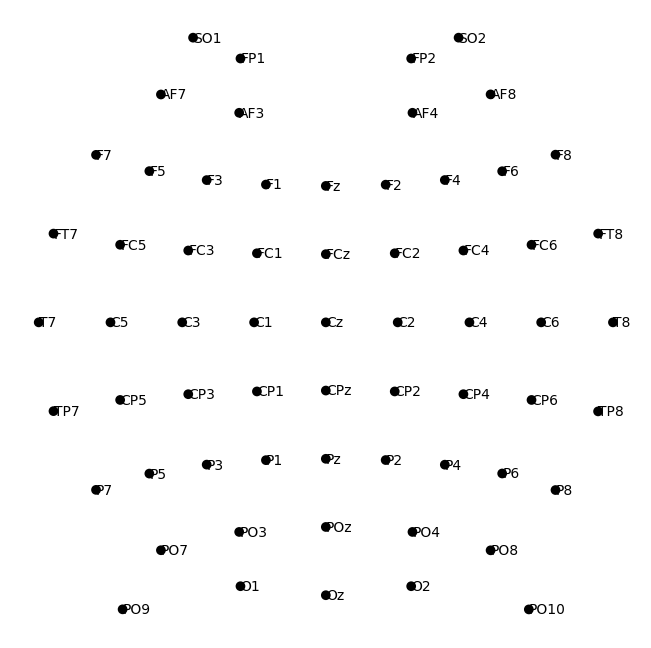

In [ ]:
target.plot_sensors(show_names = True);

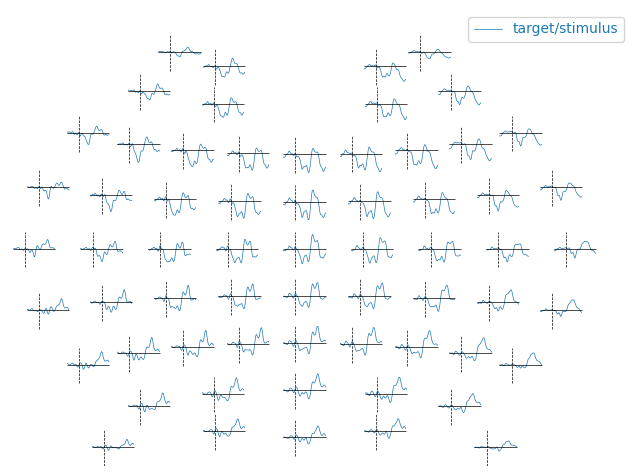

In [ ]:
target.plot_topo();

In [ ]:
x = target.data
x

array([[-2.10035779e-07, -2.76375990e-07, -4.35090465e-07, ...,
        -3.15511556e-06, -2.78982955e-06, -2.65591280e-06],
       [-1.14376609e-06, -1.12506919e-06, -1.19371127e-06, ...,
        -6.47561650e-06, -6.07672040e-06, -5.82352239e-06],
       [ 5.98786497e-07,  3.52630820e-07,  2.33978083e-07, ...,
        -9.69141079e-07, -8.53105049e-07, -9.22077135e-07],
       ...,
       [-4.99535586e-08,  3.00249661e-07,  3.81435909e-07, ...,
         2.44255773e-06,  1.95231305e-06,  1.41322679e-06],
       [-3.46014162e-08,  1.47143520e-07,  2.53983358e-07, ...,
         1.59443108e-06,  1.11796712e-06,  7.14063660e-07],
       [-1.44211725e-06, -1.33997168e-06, -1.55426495e-06, ...,
        -6.17147385e-06, -5.47561990e-06, -5.17723395e-06]])

In [ ]:
ch_names = target.info['ch_names']
ch_names

['FP1',
 'FP2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'SO1',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'SO2',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'FCz']

In [ ]:
channel = 'C4'
ch_index = [i for i,j in enumerate(ch_names) if j==channel]


Text(0.5, 0, 'Time Samples')

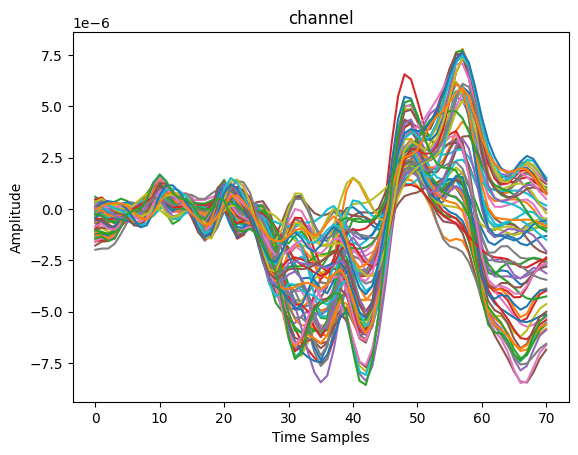

In [ ]:
plt.plot(x.T)
plt.title('channel')
plt.ylabel('Amplitude')
plt.xlabel('Time Samples')

Text(0.5, 0, 'Time Samples')

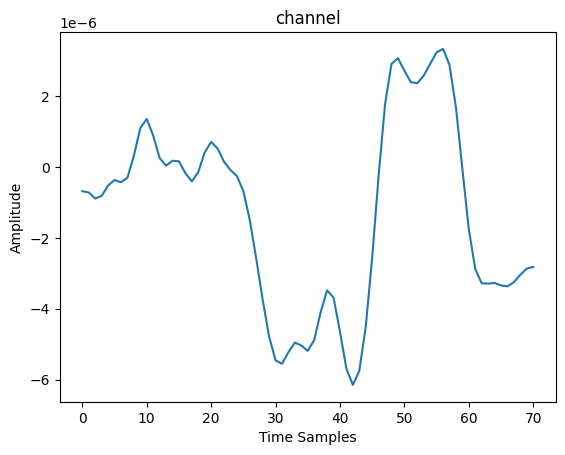

In [ ]:
plt.plot(x[ch_index[0],:])
plt.title('channel')
plt.ylabel('Amplitude')
plt.xlabel('Time Samples')

# Time Frequency Analysis

In [ ]:
epochs_for_tfr = mne.read_epochs("oddball-long-epo.fif")

Reading /content/drive/MyDrive/oddball-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-60-3b986150ffda>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs_for_tfr.compute_psd(fmin = 2, fmax =20).plot();


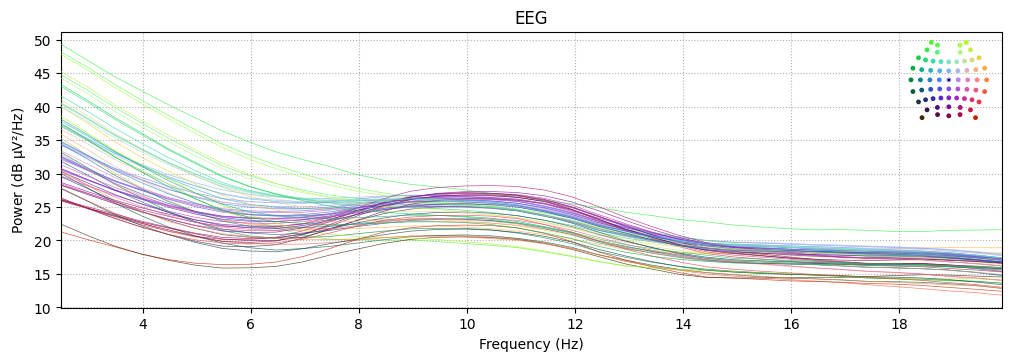

In [ ]:
epochs_for_tfr.compute_psd(fmin = 2, fmax =20).plot();

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-61-8cd10f7c67ea>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs_for_tfr.compute_psd(fmin = 0, fmax = 40).plot();


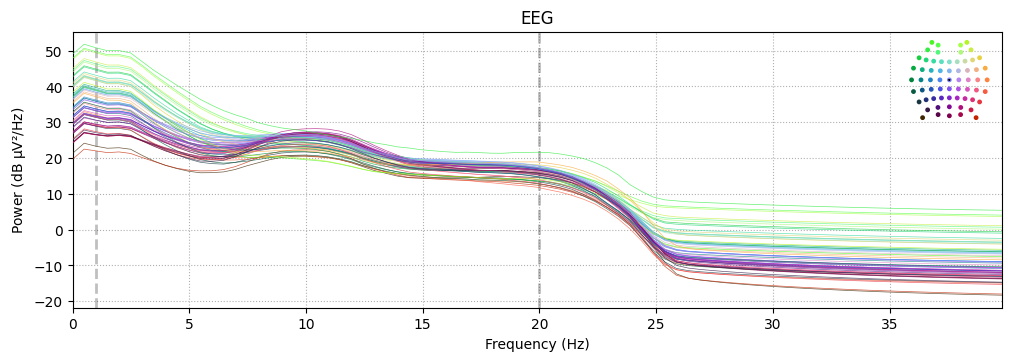

In [ ]:
epochs_for_tfr.compute_psd(fmin = 0, fmax = 40).plot();

In [ ]:
from mne.time_frequency import tfr_morlet

In [ ]:
mne.time_frequency.tfr_morlet?

In [ ]:
freqs = list(range(3,30))
tfr_target = tfr_morlet(epochs_for_tfr["target"],freqs , 3 , return_itc = False)
tfr_standard = tfr_morlet(epochs_for_tfr["standard"],freqs , 3 , return_itc = False)

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.5s


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


In [ ]:
tfr_target.data.shape

(63, 27, 201)

In [ ]:
tfr_contrast = mne.combine_evoked((tfr_target,tfr_standard),(-0.5,-0.5))
tfr_contrast.apply_baseline((None,0))

Applying baseline correction (mode: mean)


<Average Power Estimates from Epochs (nave=212.0), morlet method | 63 channels × 27 freqs × 201 times, 3.0 - 29.0 Hz, -0.50 - 1.50 s, 2.7 MB>

No baseline correction applied
No baseline correction applied


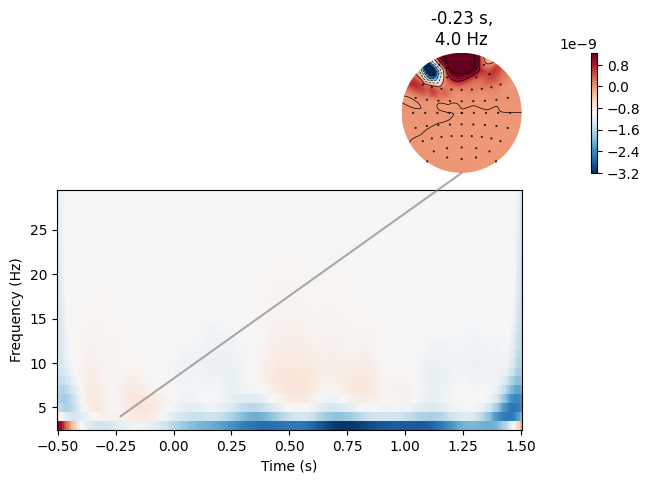

In [ ]:
tfr_contrast.plot_joint();

No baseline correction applied


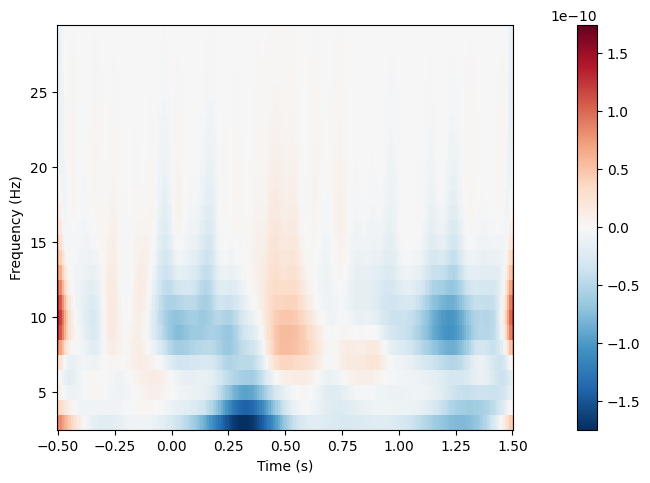

In [ ]:
tfr_contrast.plot(picks = [27]);